In [2]:
%matplotlib notebook
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
import csv
import geopandas as gpd
import shapely.geometry as sgeo

In [3]:
nypd_complaint_2020 = pd.read_csv('data/nypd_complaint_2020_cleaned.csv')
nypd_complaint_2019 = pd.read_csv('data/nypd_complaint_2019_cleaned.csv')
nypd_complaint_2020

,Unnamed: 0,date,level,susp_age_group,susp_race,susp_sex,vic_age_group,vic_race,vic_sex,latitude,longitude
0,0,12/23/2020,FELONY,UNKNOWN,UNKNOWN,Others,18-24,BLACK,M,40.625769,-73.991417
1,1,12/21/2020,FELONY,UNKNOWN,UNKNOWN,Others,25-44,BLACK,M,40.674583,-73.930222
2,2,11/22/2020,FELONY,UNKNOWN,UNKNOWN,Others,25-44,BLACK,F,40.823101,-73.869690
3,3,11/22/2020,FELONY,25-44,BLACK,M,25-44,BLACK,F,40.887451,-73.847608
4,4,11/21/2020,FELONY,UNKNOWN,UNKNOWN,Others,18-24,BLACK HISPANIC,M,40.800222,-73.930848
...,...,...,...,...,...,...,...,...,...,...,...
404846,404887,01/04/2020,MISDEMEANOR,UNKNOWN,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,Others,40.741341,-73.978393
404847,404888,01/02/2020,FELONY,UNKNOWN,UNKNOWN,Others,45-64,ASIAN / PACIFIC ISLANDER,M,40.688716,-73.826366
404848,404889,01/02/2020,FELONY,25-44,BLACK,M,UNKNOWN,UNKNOWN,Others,40.789947,-73.975354
404849,404890,01/05/2020,MISDEMEANOR,45-64,WHITE HISPANIC,M,UNKNOWN,UNKNOWN,Others,40.882338,-73.891652


In [4]:
nypd_complaint_2019['geometry'] = nypd_complaint_2019.apply(lambda row: sgeo.Point(row.longitude, row.latitude), axis = 1)
nypd_complaint_2020['geometry'] = nypd_complaint_2020.apply(lambda row: sgeo.Point(row.longitude, row.latitude), axis = 1)
nypd_complaint_2019

,Unnamed: 0,date,level,susp_age_group,susp_race,susp_sex,vic_age_group,vic_race,vic_sex,latitude,longitude,geometry
0,0,01/01/2019,FELONY,UNKNOWN,UNKNOWN,M,18-24,BLACK HISPANIC,F,40.887451,-73.847608,POINT (-73.84760778699997 40.88745131300004)
1,1,01/01/2019,FELONY,45-64,BLACK,M,UNKNOWN,UNKNOWN,E,40.701528,-73.943227,POINT (-73.94322736199997 40.70152764800008)
2,2,01/01/2019,FELONY,UNKNOWN,UNKNOWN,Others,18-24,WHITE,M,40.721274,-73.993598,POINT (-73.99359794999998 40.72127357100004)
3,3,01/01/2019,VIOLATION,45-64,BLACK,M,25-44,BLACK,F,40.809846,-73.936607,POINT (-73.93660735599997 40.80984560400003)
4,4,01/02/2019,FELONY,25-44,BLACK,M,25-44,BLACK,M,40.790850,-73.974567,POINT (-73.97456654299998 40.79085024400007)
...,...,...,...,...,...,...,...,...,...,...,...,...
450971,450971,12/22/2019,MISDEMEANOR,UNKNOWN,UNKNOWN,Others,25-44,WHITE,M,40.718183,-73.995976,POINT (-73.99597554699993 40.71818307800004)
450972,450972,12/30/2019,MISDEMEANOR,25-44,BLACK HISPANIC,M,25-44,WHITE HISPANIC,F,40.825064,-73.877397,POINT (-73.87739726099994 40.82506399000005)
450973,450973,12/27/2019,MISDEMEANOR,25-44,WHITE,M,UNKNOWN,UNKNOWN,D,40.723810,-73.991805,POINT (-73.99180465899997 40.72380961300007)
450974,450974,12/29/2019,MISDEMEANOR,25-44,WHITE,F,UNKNOWN,UNKNOWN,D,40.752388,-73.973275,POINT (-73.97327466399997 40.75238791700008)


In [6]:
nypd_complaint_2020.to_csv('data/nypd_complaint_2020_geo_cleaned.csv')
nypd_complaint_2019.to_csv('data/nypd_complaint_2019_geo_cleaned.csv')

In [7]:
#https://data.cityofnewyork.us/City-Government/Community-Districts/yfnk-k7r4
nyc_geo = gpd.read_file('data/nyc_community_districts.geojson')

In [8]:
nypd_complaint_2019_geo = nyc_geo.copy(deep=True)
nypd_complaint_2019_geo['case_num'] = 0
for i, c_row in nypd_complaint_2019.iterrows():
    for j, g_row in nypd_complaint_2019_geo.iterrows():
        if g_row.geometry.contains(c_row.geometry):
            nypd_complaint_2019_geo.at[j,'case_num'] += 1

nypd_complaint_2019_geo['case_num'] 

0      5802
1      8060
2     10309
3     11345
4     15522
      ...  
66     4847
67     3286
68       40
69     7888
70     9235
Name: case_num, Length: 71, dtype: int64

In [9]:
nypd_complaint_2019_geo

,boro_cd,shape_area,shape_leng,geometry,case_num
0,101,42689119.0133,74168.5878924,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",5802
1,102,37689205.9401,34130.5952768,"MULTIPOLYGON (((-73.99684 40.73736, -73.99362 ...",8060
2,103,46879779.2986,30695.6409632,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",10309
3,104,49311715.1126,67623.6699012,"MULTIPOLYGON (((-73.99394 40.77318, -73.99370 ...",11345
4,105,43790329.8699,35288.1885095,"MULTIPOLYGON (((-73.97301 40.76428, -73.97141 ...",15522
...,...,...,...,...,...
66,502,592715674.432,143044.989836,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ...",4847
67,503,599053419.389,193564.186317,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ...",3286
68,595,54734567.3489,110147.254437,"MULTIPOLYGON (((-74.11834 40.55046, -74.11676 ...",40
69,203,44803080.7253,33500.8967412,"MULTIPOLYGON (((-73.88072 40.83752, -73.88074 ...",7888


<IPython.core.display.Javascript object>


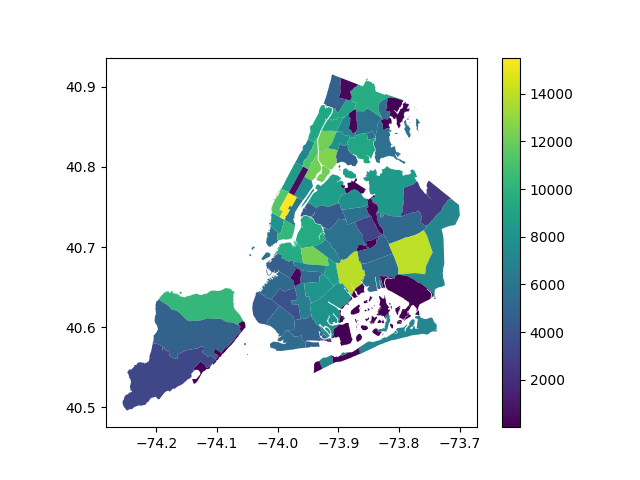

<AxesSubplot:>

In [10]:
nypd_complaint_2019_geo.plot(column='case_num', legend=True)

In [12]:
nypd_complaint_2020_geo = nyc_geo.copy(deep=True)
nypd_complaint_2020_geo['case_num'] = 0
for i, c_row in nypd_complaint_2020.iterrows():
    for j, g_row in nypd_complaint_2020_geo.iterrows():
        if g_row.geometry.contains(c_row.geometry):
            nypd_complaint_2020_geo.at[j,'case_num'] += 1

nypd_complaint_2020_geo['case_num'] 

0      3990
1      7116
2      8815
3      8766
4     10214
      ...  
66     4377
67     3175
68       34
69     7616
70     9161
Name: case_num, Length: 71, dtype: int64

<IPython.core.display.Javascript object>


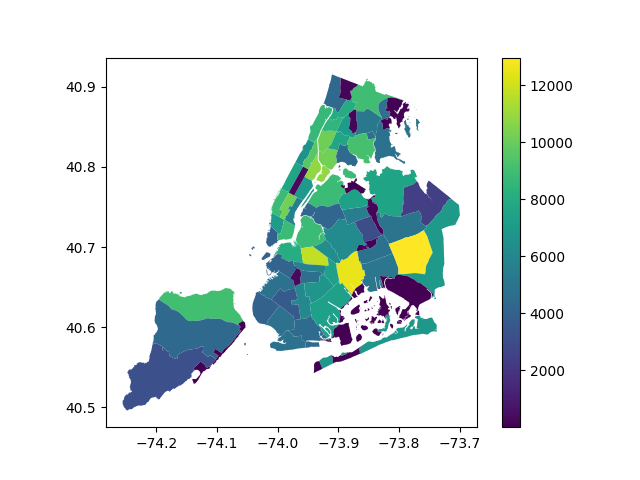

<AxesSubplot:>

In [20]:
nypd_complaint_2020_geo.plot(column='case_num', legend=True)

In [21]:
nypd_complaint_2019_geo.to_file('data/nypd_complaint_2019_geo.geojson')
nypd_complaint_2020_geo.to_file('data/nypd_complaint_2020_geo.geojson')

In [33]:
covid = pd.read_csv('data/data-by-modzcta.csv')
covid

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,label,lat,lon,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,"10001, 10118",40.750693,-73.997137,1389,5030.22,27613.09,32,115.89,7.50,18982
1,10002,Chinatown/Lower East Side,Manhattan,10002,40.715781,-73.986176,5372,7131.98,75322.71,248,329.25,12.07,45615
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,10003,40.731825,-73.989164,2532,4690.82,53977.81,45,83.37,6.46,39839
3,10004,Financial District,Manhattan,10004,40.703675,-74.013106,233,7839.53,2972.12,2,67.29,6.75,3484
4,10005,Financial District,Manhattan,10005,40.706092,-74.008861,365,4167.99,8757.23,0,0.00,6.24,5820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,11691,Edgemere/Far Rockaway,Queens,11691,40.601330,-73.761357,6813,10190.51,66856.31,433,647.66,17.50,40880
173,11692,Arverne/Edgemere,Queens,11692,40.592794,-73.792203,1651,7851.02,21029.13,100,475.53,14.79,11901
174,11693,Arverne/Broad Channel,Queens,11693,40.603699,-73.821926,1016,8017.59,12672.14,37,291.98,15.55,6696
175,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,11694,40.577599,-73.844553,2064,9932.91,20779.40,96,462.00,16.11,13182


In [34]:
covid['geometry'] = covid.apply(lambda row: sgeo.Point(row.lon, row.lat), axis = 1)

In [36]:
covid_geo = nyc_geo.copy(deep=True)
covid_geo['case_num'] = 0
covid_geo['test_num'] = 0
covid_geo['pop_deno'] = 0
covid_geo['death_num'] = 0
for i, c_row in covid.iterrows():
    for j, g_row in covid_geo.iterrows():
        if g_row.geometry.contains(c_row.geometry):
            covid_geo.at[j,'case_num'] += c_row['COVID_CASE_COUNT']
            covid_geo.at[j,'test_num'] += c_row['TOTAL_COVID_TESTS']
            covid_geo.at[j,'pop_deno'] += c_row['POP_DENOMINATOR']
            covid_geo.at[j,'death_num'] += c_row['COVID_DEATH_COUNT']
            

covid_geo 

,boro_cd,shape_area,shape_leng,geometry,case_num,test_num,pop_deno,death_num
0,101,42689119.0133,74168.5878924,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",4274,62339,88700,96
1,102,37689205.9401,34130.5952768,"MULTIPOLYGON (((-73.99684 40.73736, -73.99362 ...",2584,39300,53488,45
2,103,46879779.2986,30695.6409632,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...",11170,122724,186450,403
3,104,49311715.1126,67623.6699012,"MULTIPOLYGON (((-73.99394 40.77318, -73.99370 ...",8069,112801,159912,217
4,105,43790329.8699,35288.1885095,"MULTIPOLYGON (((-73.97301 40.76428, -73.97141 ...",0,0,0,0
...,...,...,...,...,...,...,...,...
66,502,592715674.432,143044.989836,"MULTIPOLYGON (((-74.07347 40.57839, -74.07345 ...",19955,110714,177265,695
67,503,599053419.389,193564.186317,"MULTIPOLYGON (((-74.13320 40.53631, -74.13301 ...",22539,122464,191529,469
68,595,54734567.3489,110147.254437,"MULTIPOLYGON (((-74.11834 40.55046, -74.11676 ...",0,0,0,0
69,203,44803080.7253,33500.8967412,"MULTIPOLYGON (((-73.88072 40.83752, -73.88074 ...",7499,51735,93192,339


<IPython.core.display.Javascript object>


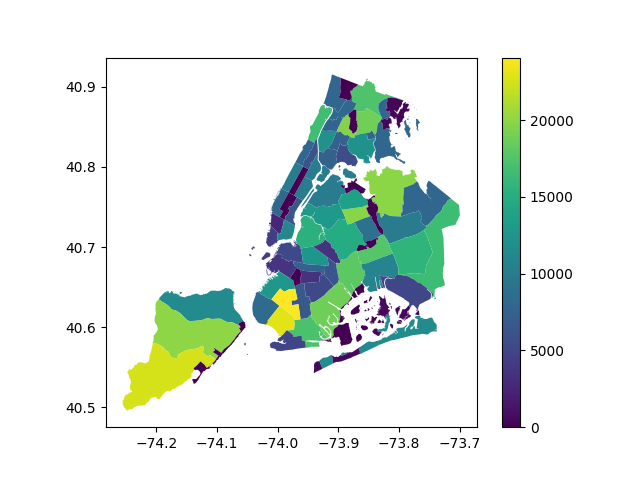

<AxesSubplot:>

In [37]:
covid_geo.plot(column='case_num', legend=True)

In [38]:
covid_geo.to_file('data/covid_geo.geojson')